In [ ]:
!pip install keras.optimizers

ERROR: Could not find a version that satisfies the requirement keras.optimizers (from versions: none)
ERROR: No matching distribution found for keras.optimizers


In [1]:
from keras.models import Model
from keras.layers import Dense, Activation
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras import backend as K
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive' ,force_remount=True)
os.listdir()

Mounted at /content/drive


['.config', 'drive', 'sample_data']

In [ ]:
os.chdir("drive/MyDrive/vaccine/shuffled2/trimmed json files/")

In [ ]:
def autoencode(model):
    
    decoded_imgs = model.predict(x_test)
    
    get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
    compressed = get_3rd_layer_output([x_test])
    
    return compressed

def test_restoration(model):
    
    decoded_imgs = model.predict(x_test)
    get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
    
    for i in range(2):
        
        print("original: ")
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        plt.show()
        
        #-------------------
        
        print("reconstructed: ")
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        plt.show()
        
        #-------------------
        
        print("compressed: ")
        current_compressed = get_3rd_layer_output([x_test[i:i+1]])[0][0]
        plt.imshow(current_compressed.reshape(8, 4))
        plt.gray()
        plt.show()
        #print(current_compressed)

In [ ]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('data.npy', data)


# load numpy array from npy file
from numpy import load
# load array
data = load('text_embeddings.npy')
# print the array
print(data.shape)


(1832669, 768)


In [ ]:
data[0].shape
instances, input_features = data[0:1466135].shape
train_dataset = data[0:1466135]
val_dataset = data[1466135:]

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# train_dataset = tf.data.Dataset.from_tensor_slices(data[0:1466135])
# val_dataset = tf.data.Dataset.from_tensor_slices(data[1466135:])

# instances, input_features = train_dataset.shape

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

instances, input_features = x_train.shape

In [ ]:
# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# val_dataset = val_dataset.batch(BATCH_SIZE)

In [ ]:
# train_size = int(0.8 * DATASET_SIZE)
# val_size = int(0.20 * DATASET_SIZE)
# test_size = int(0* DATASET_SIZE)

# full_dataset = train_dataset
# full_dataset = full_dataset.shuffle()
# train_dataset = full_dataset.take(train_size)
# test_dataset = full_dataset.skip(train_size)
# val_dataset = test_dataset.skip(test_size)
# test_dataset = test_dataset.take(test_size)

NameError: ignored

In [ ]:

# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# instances, input_features = x_train.shape

In [8]:
# input_features
type(x_train)

numpy.ndarray

In [7]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_features,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(input_features, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam')
# model.fit(x_train, x_train, epochs=3, validation_data=(x_test, x_test))

Epoch 1/3
1875/1875 [==============================] - 7s 2ms/step - loss: 0.1366 - val_loss: 0.1017
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0983 - val_loss: 0.0939
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0934 - val_loss: 0.0907


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam')
# model.fit(train_dataset, train_dataset, epochs=10, validation_data=(val_dataset, val_dataset))
model.fit(train_dataset,train_dataset,  epochs=10, validation_data=(x_test, x_test))

NameError: ignored

In [ ]:
layers = len(model.layers)

for i in range(layers):
    inp, out = model.layers[i].output.get_shape()
    print(i,". ",model.layers[i].output," (",out,")")

0 .  KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")  ( 128 )
1 .  KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='dense_1/Relu:0', description="created by layer 'dense_1'")  ( 32 )
2 .  KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense_2/Relu:0', description="created by layer 'dense_2'")  ( 128 )
3 .  KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")  ( 768 )


In [ ]:
model.summary()
model.save_weights('./checkpoints/my_checkpoint')
!mkdir -p saved_model
model.save('saved_model/my_model')
# Create a new model instance
# model = create_model()

# Restore the weights
# model.load_weights('./checkpoints/my_checkpoint')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               98432     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 768)               99072     
                                                                 
Total params: 205,856
Trainable params: 205,856
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
weights = model.get_weights()

for i in range(len(weights)):
    print(i, ". ", len(weights[i]))

0 .  768
1 .  128
2 .  128
3 .  32
4 .  32
5 .  128
6 .  128
7 .  768


In [ ]:
com = autoencode(model)

test_restoration(model)

NameError: ignored

In [ ]:
decoder = Sequential()
decoder.add(Dense(128, activation='relu', input_shape=(32,)))
decoder.add(Dense(input_features, activation='sigmoid'))
#decoder.summary()

In [ ]:

decoder_weights = decoder.get_weights()

for i in range(len(decoder_weights)):
    print(len(decoder_weights[i]))

32
128
128
784


In [ ]:
weights = model.get_weights()

temp_weights = []

for i in range(4, 8):
    temp_weights.append(weights[i])

for i in range(len(temp_weights)):
    print(len(temp_weights[i]))

decoder.set_weights(temp_weights)

32
128
128
784


In [ ]:
sample = np.array([2.59521651,5.63147545,2.05743384,4.32667685,6.58895254,0.0,3.75777841,15.93504238,8.22563648,10.76218987,9.22686291,7.61534977,8.59453583,7.27693939,0.0,0.0,6.01428413,5.45331526,4.60282326,5.23728228,6.86480665,13.43490028,5.81025648,10.99352455,10.77216816,2.27521825,5.83731318,7.09324121,3.53731441,6.28301096,4.87098885,3.07779741])
print(sample.shape)

(32,)


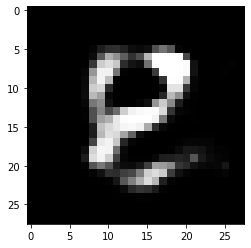

In [ ]:
restored = decoder.predict(sample.reshape(1,32))

plt.imshow(restored.reshape(28, 28))
plt.show()

In [ ]:
print(len(com[0]),"x",len(com[0][0]))

10000 x 32


In [ ]:
!pip install -q tensorflow
import tensorflow as tf

In [ ]:
# unsupervised_model = tf.contrib.learn.KMeansClustering(
#     10
#     , distance_metric = clustering_ops.SQUARED_EUCLIDEAN_DISTANCE #SQUARED_EUCLIDEAN_DISTANCE, COSINE_DISTANCE
#     , initial_clusters=tf.contrib.learn.KMeansClustering.RANDOM_INIT
# )

unsupervised_model= tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=10, use_mini_batch=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp10ogrzut', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
def train_input_fn():
    data = tf.constant(com[0], tf.float32)
    return (data, None)

In [ ]:
unsupervised_model.train(input_fn=train_input_fn, steps=5000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp10ogrzut/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 4373083.5, step = 0
INFO:tensorflow:global_step/sec: 493.977
INFO:tensorflow:loss = 2490419.8, step = 100 (0.207 sec)
INFO:tensorflow:global_step/sec: 592.845
INFO:tensorflow:loss = 2490419.8, step = 200 (0.170 sec)
INFO:tensorflow:global_step/sec: 604.764
INFO:tensorflow:loss = 2490419.8, step = 300 (0.165 sec)
INFO:tensorflow:global_step/sec: 651.693
INFO:tenso

In [ ]:
clusters = unsupervised_model.predict_cluster_index(input_fn=train_input_fn)
cluster_indices = list(unsupervised_model.predict_cluster_index(input_fn= train_input_fn))

print("following samples are clustered in same cluster:")

# index = 0
# for i in clusters:
    
#     current_cluster = i['cluster_idx']
#     features = x_test[index]
    
#     if index < 200 and current_cluster == 4:
#         plt.imshow(x_test[index].reshape(28, 28))
#         plt.gray()
#         plt.show()
       
#     index = index + 1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp10ogrzut/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
clusters_indices